In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
import pickle
import preprocess_library as pre
from scipy import signal
import pywt
import pandas as pd
from scipy import stats
from scipy.integrate import simpson
import mne
from mne.datasets.sleep_physionet.age import fetch_data
import mne
import os
import xml.etree.ElementTree as ET
import numpy as np

In [4]:
CHANNELS = [
    'EEG(sec)',      
    'ECG',   
    'EMG', 
    'EOG(L)', 
    'EOG(R)', 
    'EEG'
]

print(CHANNELS)

['EEG(sec)', 'ECG', 'EMG', 'EOG(L)', 'EOG(R)', 'EEG']


In [5]:
# Importing the channels and stages from EDF and XML file of 1 patient

FS = 125
EPOCH_SEC_LENGTH = 30
SAMPLES_PER_EPOCH = FS * EPOCH_SEC_LENGTH

INFO = mne.create_info(CHANNELS, FS, ch_types=['eeg', 'ecg', 'emg', 'eog', 'eog', 'eeg'])
print(INFO)

patient_data, patient_xml = pre.load_patient_data(10, 'Input',CHANNELS, 'Output')

patient_data = patient_data[0]
patient_stage = patient_xml[0]['stages']

data_length = len(patient_data['EEG'])
print(f'Patient data is {data_length} samples long with a sampling rate of {FS} Hz')
print(f'Patient stage is {len(patient_stage)} samples long with a sampling rate of 1 Hz')

#raw.set_channel_types({'ECG': 'ecg', 'EEG(sec)': 'eeg', 'EMG': 'emg', 'EOG(L)': 'eog', 'EOG(R)': 'eog'})

# align the data length to the stage length by removing the last 30 seconds of data
for channel in patient_data:
    patient_data[channel] = patient_data[channel][:-30*FS]
    
TIME = np.arange(0, len(patient_data['EEG'])//125, 1/125)
print(TIME)
print(len(TIME))

<Info | 7 non-empty values
 bads: []
 ch_names: EEG(sec), ECG, EMG, EOG(L), EOG(R), EEG
 chs: 2 EEG, 1 ECG, 1 EMG, 2 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: unspecified
 nchan: 6
 projs: []
 sfreq: 125.0 Hz
>
Loading raw and XML data from cache files in Output...
Successfully loaded data from cache.
--- Processing Patient R1 (Index: 0) ---
Loading EDF: Input/R1.edf


/Users/mariusfauteux/Documents/GitHub/signal-processing-CM2013-ss/EEG-Clasification_V4/preprocess_library.py:94: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose='WARNING')


Loading XML: Input/R1.xml
  Extracted 6 channels.
  Stored XML data (Events: 371, Stages: 32490, Epoch Length: 30)
Finished processing Patient R1.
--- Processing Patient R2 (Index: 1) ---
Loading EDF: Input/R2.edf


/Users/mariusfauteux/Documents/GitHub/signal-processing-CM2013-ss/EEG-Clasification_V4/preprocess_library.py:94: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose='WARNING')


Loading XML: Input/R2.xml
  Extracted 6 channels.
  Stored XML data (Events: 450, Stages: 32340, Epoch Length: 30)
Finished processing Patient R2.
--- Processing Patient R3 (Index: 2) ---
Loading EDF: Input/R3.edf


/Users/mariusfauteux/Documents/GitHub/signal-processing-CM2013-ss/EEG-Clasification_V4/preprocess_library.py:94: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose='WARNING')


Loading XML: Input/R3.xml
  Extracted 6 channels.
  Stored XML data (Events: 369, Stages: 31440, Epoch Length: 30)
Finished processing Patient R3.
--- Processing Patient R4 (Index: 3) ---
Loading EDF: Input/R4.edf


/Users/mariusfauteux/Documents/GitHub/signal-processing-CM2013-ss/EEG-Clasification_V4/preprocess_library.py:94: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose='WARNING')


Loading XML: Input/R4.xml
  Extracted 6 channels.
  Stored XML data (Events: 268, Stages: 26220, Epoch Length: 30)
Finished processing Patient R4.
--- Processing Patient R5 (Index: 4) ---
Loading EDF: Input/R5.edf


/Users/mariusfauteux/Documents/GitHub/signal-processing-CM2013-ss/EEG-Clasification_V4/preprocess_library.py:94: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose='WARNING')


Loading XML: Input/R5.xml
  Extracted 6 channels.
  Stored XML data (Events: 305, Stages: 32490, Epoch Length: 30)
Finished processing Patient R5.
--- Processing Patient R6 (Index: 5) ---
Loading EDF: Input/R6.edf


/Users/mariusfauteux/Documents/GitHub/signal-processing-CM2013-ss/EEG-Clasification_V4/preprocess_library.py:94: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose='WARNING')


Loading XML: Input/R6.xml
  Extracted 6 channels.
  Stored XML data (Events: 249, Stages: 32490, Epoch Length: 30)
Finished processing Patient R6.
--- Processing Patient R7 (Index: 6) ---
Loading EDF: Input/R7.edf


/Users/mariusfauteux/Documents/GitHub/signal-processing-CM2013-ss/EEG-Clasification_V4/preprocess_library.py:94: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose='WARNING')


Loading XML: Input/R7.xml
  Extracted 6 channels.
  Stored XML data (Events: 315, Stages: 27540, Epoch Length: 30)
Finished processing Patient R7.
--- Processing Patient R8 (Index: 7) ---
Loading EDF: Input/R8.edf


/Users/mariusfauteux/Documents/GitHub/signal-processing-CM2013-ss/EEG-Clasification_V4/preprocess_library.py:94: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose='WARNING')


Loading XML: Input/R8.xml
  Extracted 6 channels.
  Stored XML data (Events: 191, Stages: 28740, Epoch Length: 30)
Finished processing Patient R8.
--- Processing Patient R9 (Index: 8) ---
Loading EDF: Input/R9.edf


/Users/mariusfauteux/Documents/GitHub/signal-processing-CM2013-ss/EEG-Clasification_V4/preprocess_library.py:94: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose='WARNING')


Loading XML: Input/R9.xml
  Extracted 6 channels.
  Stored XML data (Events: 750, Stages: 32550, Epoch Length: 30)
Finished processing Patient R9.
--- Processing Patient R10 (Index: 9) ---
Loading EDF: Input/R10.edf


/Users/mariusfauteux/Documents/GitHub/signal-processing-CM2013-ss/EEG-Clasification_V4/preprocess_library.py:94: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose='WARNING')


Loading XML: Input/R10.xml
  Extracted 6 channels.
  Stored XML data (Events: 215, Stages: 32490, Epoch Length: 30)
Finished processing Patient R10.

--- Data Loading Loop Complete ---
Total patients attempted: 10
Successfully loaded data sets (EDF+XML pairs): 10

Saving loaded raw and XML data to cache files in Output...
Data successfully saved to cache.
Patient data is 4065000 samples long with a sampling rate of 125 Hz
Patient stage is 32490 samples long with a sampling rate of 1 Hz
[0.0000000e+00 8.0000000e-03 1.6000000e-02 ... 3.2489976e+04 3.2489984e+04
 3.2489992e+04]
4061250


In [1]:
patient_data, patient_stage, TIME = pre.extract_data(10, CHANNELS, FS)

NameError: name 'pre' is not defined

In [4]:
SECONDS_TO_REMOVE = 30 * 60 # 30 minutes in seconds
SAMPLES_TO_REMOVE = SECONDS_TO_REMOVE * FS

# Remove the first and last 30 min of data 
for channel in patient_data:
    patient_data[channel] = patient_data[channel][SAMPLES_TO_REMOVE:-SAMPLES_TO_REMOVE]
patient_stage = patient_stage[SECONDS_TO_REMOVE:-SECONDS_TO_REMOVE]

print(len(patient_data['EEG'])//125)
print(len(patient_stage))


28890
28890


In [5]:
filtered_data = patient_data.copy()
for channel in filtered_data:
    # Band pass filter
    temp_filtered = mne.filter.filter_data(filtered_data[channel], FS, 0.5, 62.0, fir_design='firwin', verbose=False) # Max freq < Fs/2
    # Notch filter
    filtered_data[channel] = mne.filter.notch_filter(temp_filtered, FS, 60, method='fir', fir_design='firwin', verbose=False)


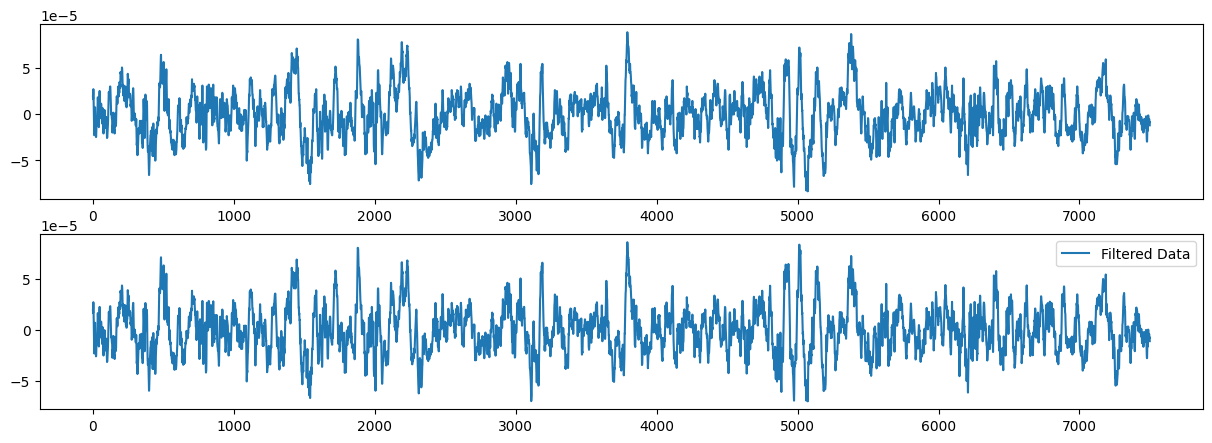

In [6]:

# Plot patient data and filtered data
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.plot(patient_data['EEG'][10*FS*60:11*FS*60], label='Patient Data')
plt.subplot(2, 1, 2)
plt.plot(filtered_data['EEG'][10*FS*60:11*FS*60], label='Filtered Data')
plt.legend()
plt.show()


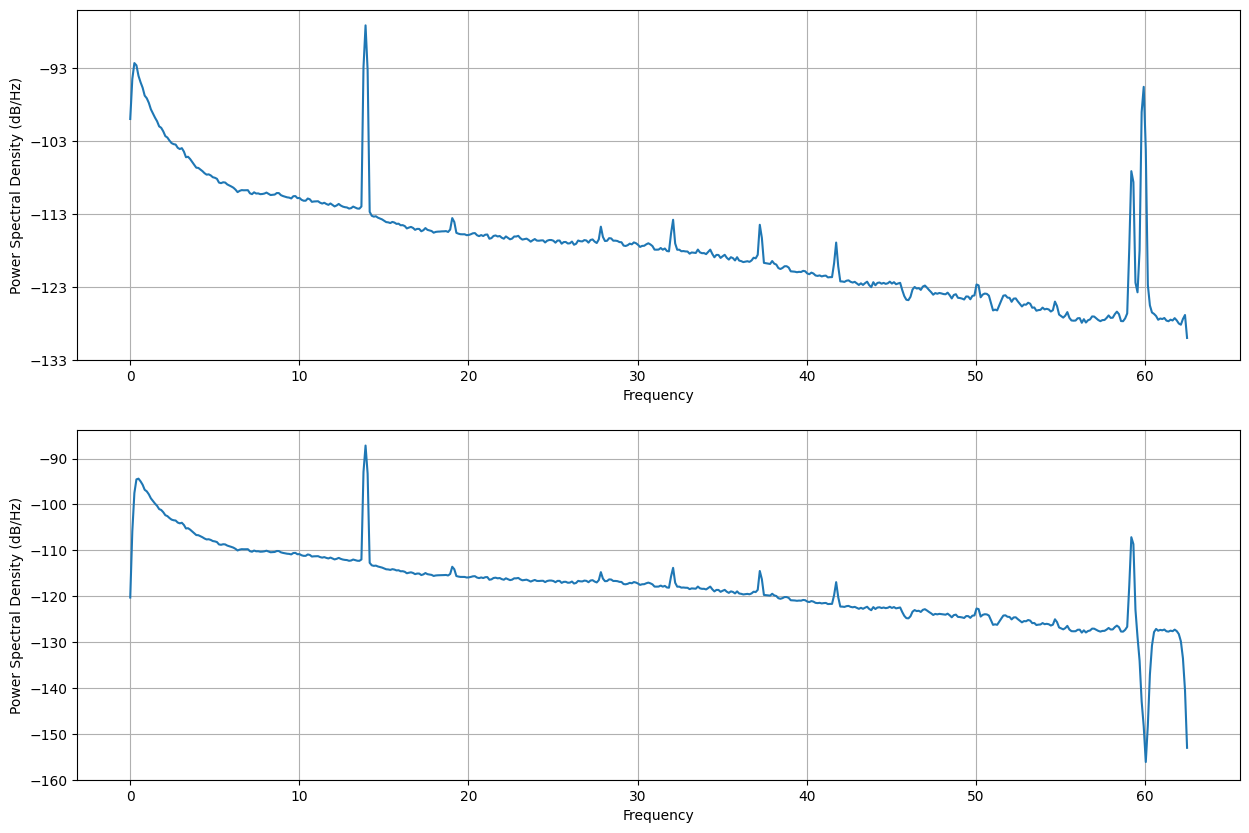

In [7]:
# Plot the psd of the patient data and filtered data
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.psd(patient_data['EEG'], 2**10, Fs=FS)
plt.subplot(2, 1, 2)
plt.psd(filtered_data['EEG'], 2**10, Fs=FS)
plt.show()

In [8]:
print(len(filtered_data['ECG']))
print(len(filtered_data['EEG']))
print(len(filtered_data['EOG(L)']))

3611250
3611250
3611250


Applying EOG filtering to EEG...
  EOG filtering applied. EEG length: 3611250
Applying ECG filtering to EEG (post-EOG)...
  ECG filtering applied. EEG length: 3611250


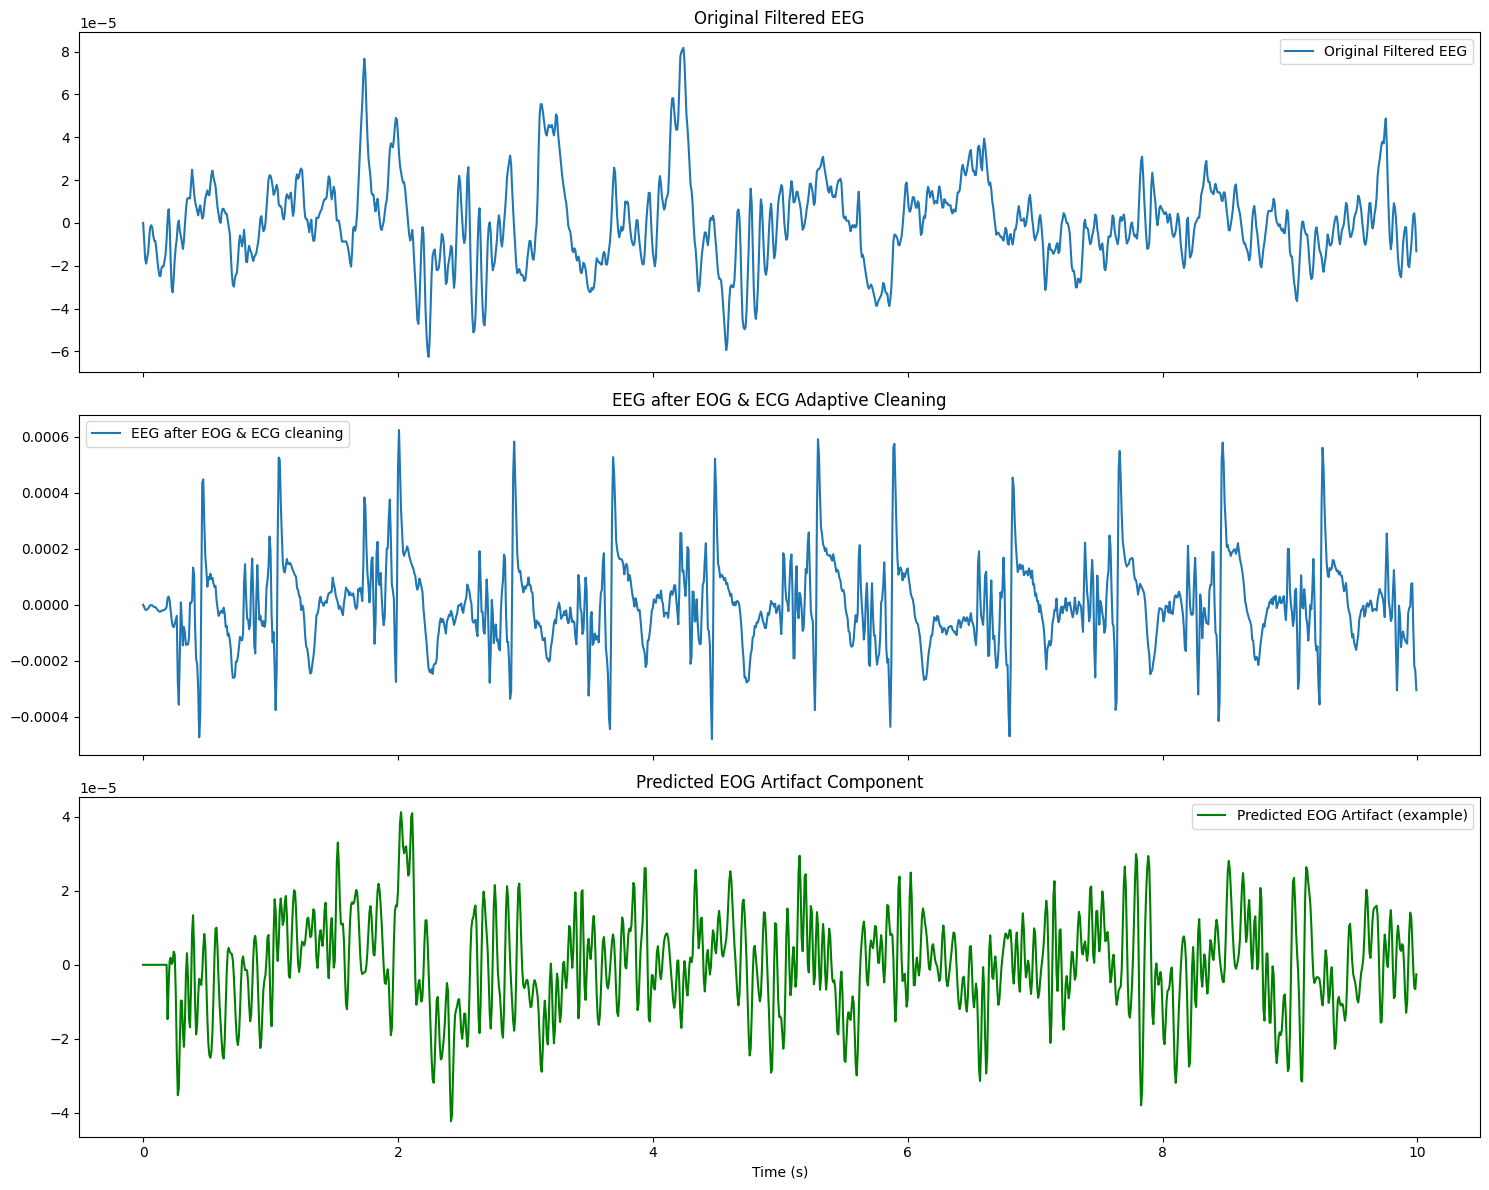

In [9]:
from scipy.signal import lfilter, butter
import neurokit2 as nk
import padasip as pa

# --- Configuration ---
N_EOG_FILTER = 25  # Order for EOG filter
MU_EOG = 0.005     # Learning rate for EOG NLMS
N_ECG_FILTER = 35  # Order for ECG filter (often needs to be higher than EOG)
MU_ECG = 0.001     # Learning rate for ECG NLMS
EEG_CHANNEL_NAME = 'EEG' # Or 'EEG(sec)' or loop through a list
EOG_L_NAME = 'EOG(L)'
EOG_R_NAME = 'EOG(R)'
ECG_NAME = 'ECG'

# --- Create a new dictionary for adaptively filtered data ---
adaptively_filtered_data_out = filtered_data.copy() # Work on a copy

# --- Get Signals ---
# Make sure these channels exist in filtered_data
if EEG_CHANNEL_NAME not in filtered_data or \
   EOG_L_NAME not in filtered_data or \
   EOG_R_NAME not in filtered_data or \
   ECG_NAME not in filtered_data:
    print("Error: One or more required channels not found in filtered_data. Skipping adaptive filtering.")
    # return adaptively_filtered_data_out # Or handle error as appropriate
else:
    eeg_signal_current = filtered_data[EEG_CHANNEL_NAME].copy() # Start with the simply filtered EEG
    eog_l_ref = filtered_data[EOG_L_NAME]
    eog_r_ref = filtered_data[EOG_R_NAME]
    ecg_ref_signal = filtered_data[ECG_NAME]

    # --- 1. EOG Artifact Removal using Differential EOG ---
    print(f"Applying EOG filtering to {EEG_CHANNEL_NAME}...")
    eog_diff_ref = eog_l_ref - eog_r_ref

    if len(eog_diff_ref) < N_EOG_FILTER or len(eeg_signal_current) < N_EOG_FILTER :
        print(f"  Signal too short for EOG filter order {N_EOG_FILTER}. Skipping EOG filtering.")
    else:
        # Prepare inputs for padasip
        # x_eog_history will be (len(eog_diff_ref) - N_EOG_FILTER + 1, N_EOG_FILTER)
        x_eog_history = pa.input_from_history(eog_diff_ref, N_EOG_FILTER)
        # d_eeg_target_eog must align with x_eog_history
        d_eeg_target_eog = eeg_signal_current[N_EOG_FILTER-1:]

        # Initialize and run EOG filter
        f_eog = pa.filters.AdaptiveFilter(model="NLMS", n=N_EOG_FILTER, mu=MU_EOG, w="random")
        y_predicted_eog_artifact, e_eeg_cleaned_from_eog, w_eog = f_eog.run(d_eeg_target_eog, x_eog_history)

        # Update the current EEG signal:
        # The first N_EOG_FILTER-1 samples of eeg_signal_current remain as they were.
        # The rest are replaced with the EOG-cleaned segment.
        eeg_signal_current[N_EOG_FILTER-1:] = e_eeg_cleaned_from_eog
        print(f"  EOG filtering applied. EEG length: {len(eeg_signal_current)}")

    # At this point, eeg_signal_current contains the EOG-cleaned EEG signal
    # (or original if EOG filtering was skipped due to length)

    # --- 2. ECG Artifact Removal (on EOG-cleaned EEG) ---
    print(f"Applying ECG filtering to {EEG_CHANNEL_NAME} (post-EOG)...")
    if len(ecg_ref_signal) < N_ECG_FILTER or len(eeg_signal_current) < N_ECG_FILTER:
        print(f"  Signal too short for ECG filter order {N_ECG_FILTER}. Skipping ECG filtering.")
    else:
        # Prepare inputs for padasip
        x_ecg_history = pa.input_from_history(ecg_ref_signal, N_ECG_FILTER)
        # d_eeg_target_ecg is the EOG-cleaned EEG, aligned for ECG filtering
        d_eeg_target_ecg = eeg_signal_current[N_ECG_FILTER-1:]

        # Initialize and run ECG filter
        f_ecg = pa.filters.AdaptiveFilter(model="NLMS", n=N_ECG_FILTER, mu=MU_ECG, w="random")
        y_predicted_ecg_artifact, e_eeg_cleaned_from_ecg, w_ecg = f_ecg.run(d_eeg_target_ecg, x_ecg_history)

        # Update the current EEG signal (which was already EOG-cleaned):
        # The first N_ECG_FILTER-1 samples of eeg_signal_current remain as they were (EOG cleaned).
        # The rest are replaced with the ECG-cleaned (and EOG-cleaned) segment.
        eeg_signal_current[N_ECG_FILTER-1:] = e_eeg_cleaned_from_ecg
        print(f"  ECG filtering applied. EEG length: {len(eeg_signal_current)}")

    # --- Store the fully processed EEG signal ---
    adaptively_filtered_data_out[EEG_CHANNEL_NAME] = eeg_signal_current

    # --- Plotting (Optional Example for 'EEG' channel) ---
    if EEG_CHANNEL_NAME == 'EEG': # Example plot condition
        import matplotlib.pyplot as plt
        fig, axs = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
        plot_len = min(len(filtered_data[EEG_CHANNEL_NAME]), 10 * FS) # Plot 10 seconds
        time_axis = np.arange(plot_len) / FS

        axs[0].plot(time_axis, filtered_data[EEG_CHANNEL_NAME][:plot_len], label='Original Filtered EEG')
        axs[0].set_title('Original Filtered EEG')
        axs[0].legend()

        # Need to reconstruct the EOG-cleaned signal for plotting if not saved separately
        # For simplicity, we plot the final output here:
        # To plot intermediate EOG-cleaned, you'd save 'eeg_signal_current' after EOG step.

        axs[1].plot(time_axis, adaptively_filtered_data_out[EEG_CHANNEL_NAME][:plot_len], label='EEG after EOG & ECG cleaning')
        axs[1].set_title('EEG after EOG & ECG Adaptive Cleaning')
        axs[1].legend()
        
        # Plot one of the artifacts removed
        if len(eog_diff_ref) >= N_EOG_FILTER and len(filtered_data[EEG_CHANNEL_NAME]) >= N_EOG_FILTER :
            # Re-run EOG filter just for plotting the artifact (if not stored)
            _x_eog_hist = pa.input_from_history(eog_diff_ref, N_EOG_FILTER)
            _d_eeg_target_eog = filtered_data[EEG_CHANNEL_NAME][N_EOG_FILTER-1:]
            _f_eog = pa.filters.AdaptiveFilter(model="NLMS", n=N_EOG_FILTER, mu=MU_EOG, w="random")
            _y_predicted_eog_artifact, _, _ = _f_eog.run(_d_eeg_target_eog, _x_eog_hist)
            
            # Pad y_predicted_eog_artifact to align with original EEG for plotting
            padded_eog_artifact = np.zeros_like(filtered_data[EEG_CHANNEL_NAME])
            padded_eog_artifact[N_EOG_FILTER-1:N_EOG_FILTER-1+len(_y_predicted_eog_artifact)] = _y_predicted_eog_artifact

            axs[2].plot(time_axis, padded_eog_artifact[:plot_len], label='Predicted EOG Artifact (example)', color='green')
            axs[2].set_title('Predicted EOG Artifact Component')
            axs[2].legend()

        plt.xlabel("Time (s)")
        plt.tight_layout()
        plt.show()

In [10]:
# Adaptive filtering off the filtered data with the ECG, and EOG channels
from scipy.signal import lfilter, butter
import neurokit2 as nk
import padasip as pa

# Create a new dictionary for adaptively filtered data
adaptively_filtered_data = filtered_data.copy() # Start with simply filtered data

# For EEG channel using EOG(L)
eeg_signal_to_clean = filtered_data['EEG']
eog_r_ref = filtered_data['EOG(R)']
eog_l_ref = filtered_data['EOG(L)']
eog_ref = eog_l_ref - eog_r_ref

ecg_ref = filtered_data['ECG']

n_eog = 25 # size (number of taps) of the filter
n_ecg = 25 
mu_eog = 0.001 # learning rate (step size) in range from 0.1 to 0.00001
mu_ecg = 0.001 

# Align inputs for padasip
# x_eog_l will be shorter by n-1
x_eog = pa.input_from_history(eog_ref, n_eog) 
# d_eeg must match length of x_eog_l; take same segment from original EEG
d_eeg = eeg_signal_to_clean[n_eog-1:] # Align target with reference history

f_eog = pa.filters.AdaptiveFilter(model="NLMS", n=n_eog, mu=mu_eog, w="random")
y_predicted_artifact_eog, e_cleaned_eeg, w_eog = f_eog.run(d_eeg, x_eog)

# Or, ensure all processing maintains consistent lengths.
# Here, we'll update the segment that was processed.
adaptively_filtered_data['EEG'] = eeg_signal_to_clean # Initialize with previous step
adaptively_filtered_data['EEG'][n_eog-1:] = e_cleaned_eeg # Update the processed part


x_ecg = pa.input_from_history(ecg_ref, n_ecg)
d_eeg = adaptively_filtered_data['EEG'][n_ecg-1:]

f_ecg = pa.filters.AdaptiveFilter(model="NLMS", n=n_ecg, mu=mu_ecg, w="random")
y_predicted_artifact_ecg, e_cleaned_eeg, w_eeg = f_ecg.run(d_eeg, x_ecg)

adaptively_filtered_data['EEG'] = eeg_signal_to_clean # Initialize with previous step
adaptively_filtered_data['EEG'][n_ecg-1:] = e_cleaned_eeg # Update the processed part

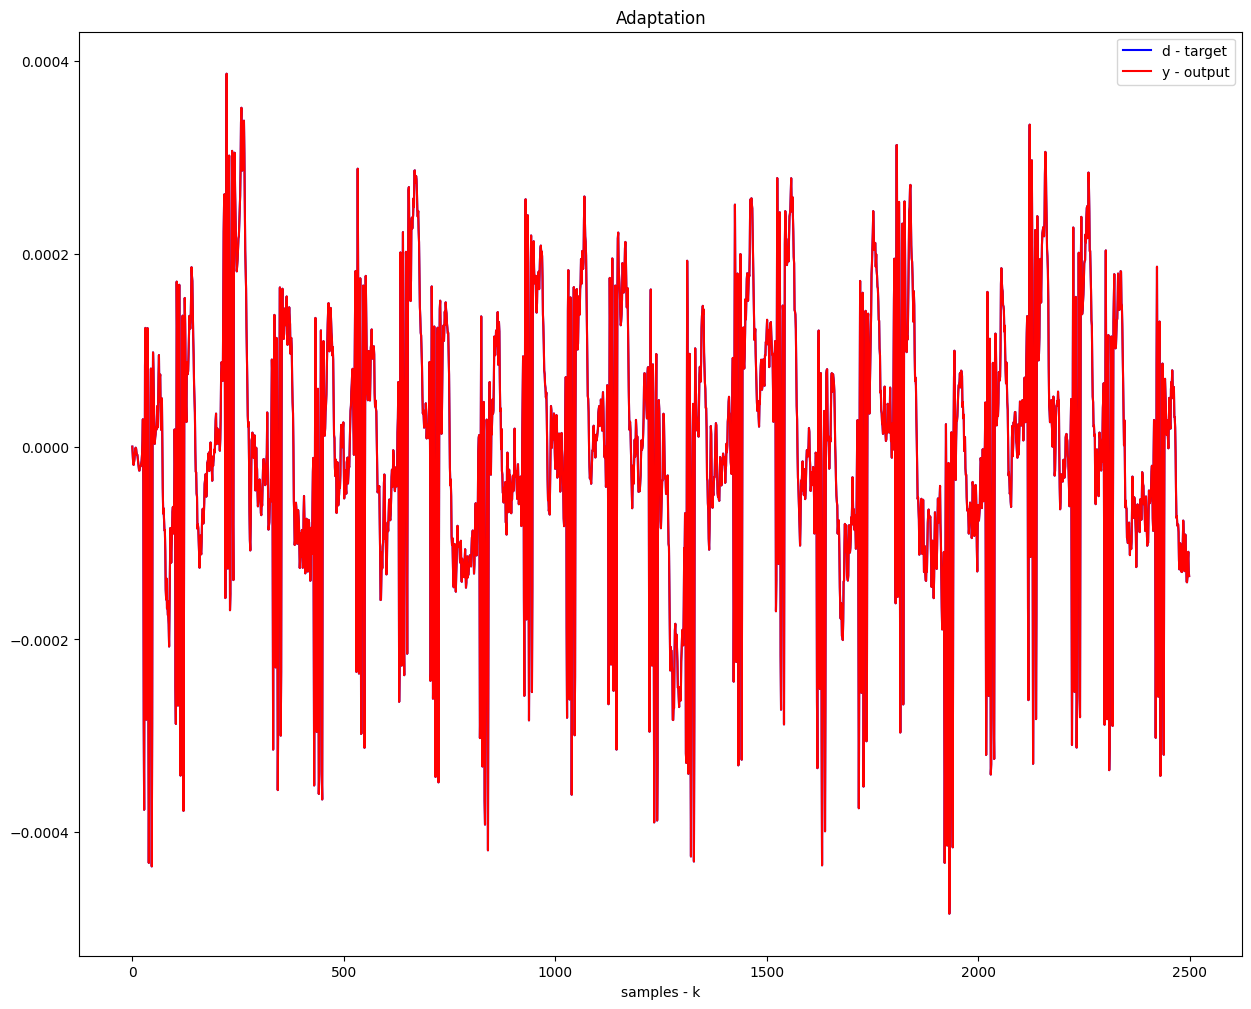

In [11]:
# Plot the filtered data and the original data
plt.figure(figsize=(15,12))
plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(eeg_signal_to_clean[:20*FS],"b", label="d - target")
plt.plot(adaptively_filtered_data['EEG'][:20*FS],"r", label="y - output");plt.legend()
plt.show()

Wavelet denoising process complete.


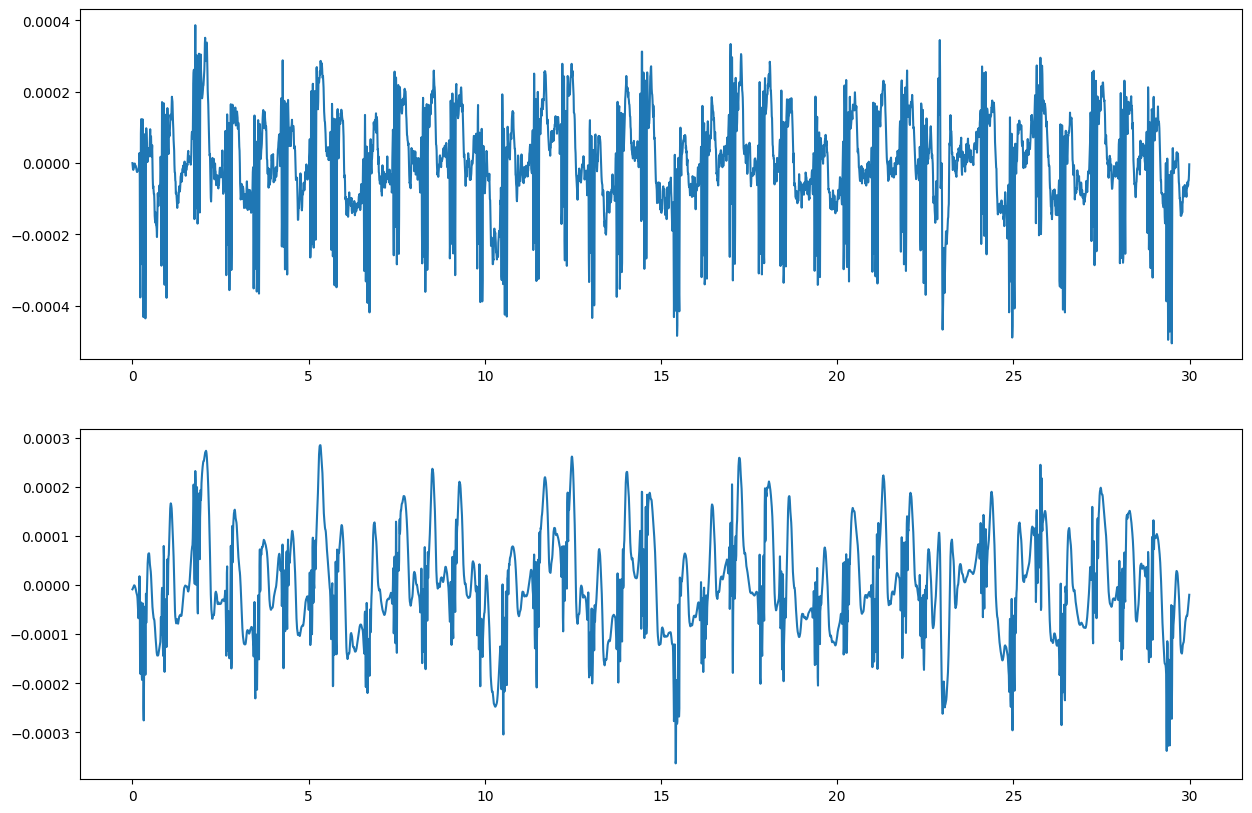

In [12]:
import pywt
import numpy as np

# --- EEG signal to be filtered ---
wavelet_cleaned_data = filtered_data.copy()
signal_to_process = wavelet_cleaned_data['EEG']

# --- Wavelet Denoising Parameters ---
wavelet = 'db4'  # Daubechies 4 is a common choice for biomedical signals.
level = 4        # Decomposition level. This should be chosen based on the signal's sampling rate
                 # and the frequency bands of interest. For Fs=125Hz, level 4 means:
                 # cA_level, cD_level, cD_level-1, ..., cD1
                 # cD1 corresponds to the highest frequencies.
                 # For Fs=125Hz:
                 # cD1: 31.25 - 62.5 Hz
                 # cD2: 15.625 - 31.25 Hz
                 # cD3: 7.8125 - 15.625 Hz
                 # cD4: 3.90625 - 7.8125 Hz
                 # cA4: 0 - 3.90625 Hz
                 # Max level can be determined by: pywt.dwt_max_level(len(signal_to_process), pywt.Wavelet(wavelet))

# --- 1. Wavelet Decomposition ---
# Decompose the signal into wavelet coefficients
coeffs = pywt.wavedec(signal_to_process, wavelet, level=level)
# coeffs is a list of arrays: [cA_level, cD_level, cD_level-1, ..., cD1]

# --- 2. Thresholding Detail Coefficients ---
# We will apply a threshold to the detail coefficients (cD_level down to cD1).
# The approximation coefficients (cA_level) are usually kept.
thresholded_coeffs = [coeffs[0]]  # Keep the approximation coefficients

# Iterate through the detail coefficient sets (from cD_level to cD1)
for i in range(1, len(coeffs)):
    detail_coeff_set = coeffs[i]
    
    # Estimate noise standard deviation (sigma) using Median Absolute Deviation (MAD)
    # This is a robust estimator, less sensitive to outliers than standard deviation.
    # sigma_hat = MAD / 0.6745 (0.6745 is the Gaussian equivalent scaling factor)
    median_val = np.median(detail_coeff_set)
    mad = np.median(np.abs(detail_coeff_set - median_val))
    sigma = mad / 0.6745
    
    # Calculate Universal Threshold (VisuShrink by Donoho & Johnstone)
    # T = sigma * sqrt(2 * log(N)), where N is the length of the signal
    N = len(signal_to_process)
    threshold_value = sigma * np.sqrt(2 * np.log(N)) if N > 1 and sigma > 0 else 0
    # If sigma is 0 (e.g., coefficients are constant), threshold is 0 (no thresholding).
    
    # Apply soft thresholding
    # Soft thresholding: shrinks coefficients towards zero.
    # y = sgn(x) * max(0, |x| - T)
    thresholded_detail_set = pywt.threshold(detail_coeff_set, value=threshold_value, mode='soft')
    thresholded_coeffs.append(thresholded_detail_set)

# --- 3. Wavelet Reconstruction ---
# Reconstruct the signal from the (mostly thresholded) coefficients
eeg_wavelet_denoised = pywt.waverec(thresholded_coeffs, wavelet)

# Ensure the reconstructed signal has the same length as the original input signal.
# Wavelet reconstruction can sometimes result in a length mismatch of one sample.
if len(eeg_wavelet_denoised) != len(signal_to_process):
    eeg_wavelet_denoised = eeg_wavelet_denoised[:len(signal_to_process)]

print("Wavelet denoising process complete.")

# plot the original and filtered signal
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(TIME[:FS*30],signal_to_process[:FS*30])
plt.subplot(2,1,2)
plt.plot(TIME[:FS*30], eeg_wavelet_denoised[:FS*30])


In [13]:
NB_EPOCHS = len(filtered_data['EEG'])//SAMPLES_PER_EPOCH
print(NB_EPOCHS)
# Creat epochs of 30 seconds
patient_epoch = {} # Initialize as a dictionary

# Process each channel
for channel_name in CHANNELS:
    # Get the channel data for this patient
    channel_data = filtered_data[channel_name]

    # Create a list to store all epochs for this channel
    channel_epochs = []

    # Split the data into epochs
    for epoch_idx in range(NB_EPOCHS):
        start_idx = epoch_idx * SAMPLES_PER_EPOCH
        end_idx = start_idx + SAMPLES_PER_EPOCH
        epoch_data = channel_data[start_idx:end_idx]
        channel_epochs.append(epoch_data)

    # Store all epochs for this channel in the patient's dictionary
    patient_epoch[channel_name] = channel_epochs

    print(f"  - Channel {channel_name}: Created {len(channel_epochs)} epochs of length {SAMPLES_PER_EPOCH}")

963
  - Channel EEG(sec): Created 963 epochs of length 3750
  - Channel ECG: Created 963 epochs of length 3750
  - Channel EMG: Created 963 epochs of length 3750
  - Channel EOG(L): Created 963 epochs of length 3750
  - Channel EOG(R): Created 963 epochs of length 3750
  - Channel EEG: Created 963 epochs of length 3750


In [14]:
# In the same data structure, store the epoch of the hypnogram
patient_epoch['hypnogram'] = []
# Split the data into epochs
for epoch_idx in range(NB_EPOCHS):
    start_idx = epoch_idx * 30
    end_idx = start_idx + 30
    epoch_data = patient_stage[start_idx:end_idx]
    # AASM scoring rules typically use a majority rule for the 30-second epoch
    dominant_stage = stats.mode(epoch_data)[0] 
    patient_epoch['hypnogram'].append(dominant_stage)
        
print(len(patient_epoch['hypnogram']))

963


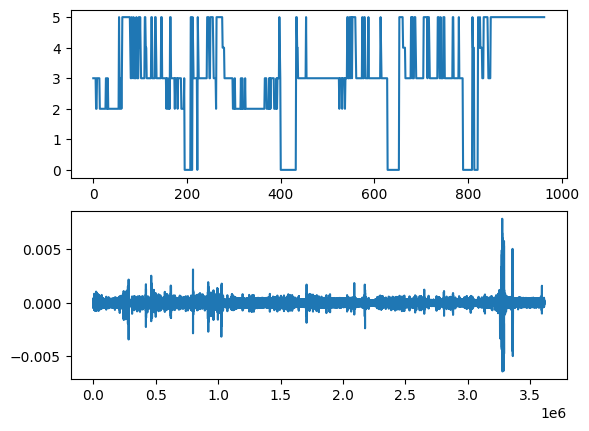

In [15]:

plt.subplot(2,1,1)
plt.plot(patient_epoch['hypnogram'])
plt.subplot(2,1,2)
plt.plot(filtered_data['EEG'])
plt.show()

In [16]:
import numpy as np
from scipy import signal, stats, integrate
import nolds # Optional: for fractal dimension, Lyapunov exponent etc. pip install nolds
from pywt import wavedec # If you want wavelet-based features beyond just denoising
import pandas as pd

# --- Helper for Spectral Power ---
def get_band_power(epoch_data, fs, band, window_sec=None, relative=False):
    from scipy.signal import welch
    from scipy.integrate import simpson

    band = np.asarray(band)
    low, high = band
    if window_sec is not None:
        nperseg = int(window_sec * fs) # Ensure nperseg is int
    else:
        nperseg = len(epoch_data)
    if nperseg == 0: return 0 # Handle empty epoch_data

    freqs, psd = welch(epoch_data, fs=fs, nperseg=nperseg)
    if len(freqs) == 0: return 0 # Handle case where welch returns empty

    idx_band = np.logical_and(freqs >= low, freqs <= high)
    freq_res = freqs[1] - freqs[0] if len(freqs) > 1 else 1.0 # Avoid div by zero if only one freq point
    band_power = simpson(psd[idx_band], dx=freq_res)

    if relative:
        total_power = simpson(psd, dx=freq_res)
        return (band_power / total_power) * 100 if total_power > 1e-9 else 0
    else:
        return band_power

def extract_eeg_features(epoch_data, fs):
    """
    Extracts a comprehensive set of features from a single EEG epoch.
    Simplified version with nolds and wavelet features enabled.
    """
    features = {}
    epoch_data = np.asarray(epoch_data).squeeze() # Ensure 1D numpy array

    # --- 1. Time-Domain Statistical Features ---
    features['mean'] = np.mean(epoch_data)
    features['median'] = np.median(epoch_data)
    features['std'] = np.std(epoch_data)
    features['variance'] = np.var(epoch_data)
    features['kurtosis'] = stats.kurtosis(epoch_data)
    features['skewness'] = stats.skew(epoch_data)
    features['rms'] = np.sqrt(np.mean(epoch_data**2))
    features['peak_to_peak'] = np.ptp(epoch_data)
    features['zero_crossings'] = len(np.where(np.diff(np.sign(epoch_data)))[0])

    # --- 2. Hjorth Parameters ---
    diff_epoch = np.diff(epoch_data)
    diff2_epoch = np.diff(diff_epoch)
    var_epoch = np.var(epoch_data)
    var_diff_epoch = np.var(diff_epoch) if len(diff_epoch) > 0 else 0
    var_diff2_epoch = np.var(diff2_epoch) if len(diff2_epoch) > 0 else 0

    features['hjorth_activity'] = var_epoch
    features['hjorth_mobility'] = np.sqrt(var_diff_epoch / var_epoch) if var_epoch > 1e-9 else 0
    if features['hjorth_mobility'] > 1e-9 and var_diff_epoch > 1e-9:
        mobility_diff = np.sqrt(var_diff2_epoch / var_diff_epoch)
        features['hjorth_complexity'] = mobility_diff / features['hjorth_mobility']
    else:
        features['hjorth_complexity'] = 0

    # --- 3. Spectral Features ---
    bands = {
        'delta': (0.5, 4.0), 'theta': (4.0, 8.0), 'alpha': (8.0, 13.0),
        'sigma': (11.0, 16.0), 'beta':  (13.0, 30.0), 'gamma': (30.0, min(60.0, fs/2 - 0.1))
    }
    freqs_welch, psd_welch = signal.welch(epoch_data, fs, nperseg=min(len(epoch_data), 256)) # Use a fixed reasonable nperseg
    total_power = integrate.simpson(psd_welch, dx=(freqs_welch[1]-freqs_welch[0])) if len(freqs_welch)>1 else 0

    for band_name, band_freqs in bands.items():
        abs_p = get_band_power(epoch_data, fs, band_freqs, relative=False)
        features[f'abs_power_{band_name}'] = abs_p
        features[f'rel_power_{band_name}'] = (abs_p / total_power) * 100 if total_power > 1e-9 else 0

    if total_power > 1e-9 and len(freqs_welch) > 1:
        cumulative_power = np.cumsum(psd_welch) * (freqs_welch[1]-freqs_welch[0])
        try:
            features['sef50'] = freqs_welch[np.where(cumulative_power >= 0.50 * total_power)[0][0]]
            features['sef95'] = freqs_welch[np.where(cumulative_power >= 0.95 * total_power)[0][0]]
        except IndexError:
            features['sef50'], features['sef95'] = 0, 0
        features['spectral_centroid'] = np.sum(freqs_welch * psd_welch) / np.sum(psd_welch) if np.sum(psd_welch) > 1e-9 else 0
        norm_psd = psd_welch / (np.sum(psd_welch) + 1e-12)
        features['spectral_entropy'] = -np.sum(norm_psd * np.log2(norm_psd + 1e-12))
    else:
        features['sef50'], features['sef95'], features['spectral_centroid'], features['spectral_entropy'] = 0,0,0,0


    # --- 4. Nonlinear Features using 'nolds' ---
    try:
        if len(epoch_data) > 20: # nolds functions might need minimum length
            features['hurst_exponent'] = nolds.hurst_rs(epoch_data)
            features['dfa'] = nolds.dfa(epoch_data)
            features['sample_entropy'] = nolds.sampen(epoch_data, emb_dim=2, tolerance=0.2 * np.std(epoch_data)) # Common practice for tolerance
            # features['correlation_dimension'] = nolds.corr_dim(epoch_data, emb_dim=2) # Can be slow
            # features['lyap_r'] = nolds.lyap_r(epoch_data, emb_dim=10) # Often needs tuning and longer data
        else:
            raise ValueError("Epoch too short for nolds")
    except Exception: # Catch any error from nolds
        features['hurst_exponent'], features['dfa'], features['sample_entropy'] = np.nan, np.nan, np.nan
        # features['correlation_dimension'], features['lyap_r'] = np.nan, np.nan

    # --- 5. Wavelet-based Features ---
    try:
        # Ensure epoch_data is suitable for wavedec (e.g. length)
        max_level = pywt.dwt_max_level(len(epoch_data), pywt.Wavelet('db4').dec_len)
        level_to_use = min(4, max_level) # Use level 4 or max possible if less
        if level_to_use > 0:
            coeffs = wavedec(epoch_data, 'db4', level=level_to_use)
            for i, coeff_arr in enumerate(coeffs):
                features[f'wavelet_energy_level_{i}'] = np.sum(coeff_arr**2)
                features[f'wavelet_std_level_{i}'] = np.std(coeff_arr)
                features[f'wavelet_mean_abs_level_{i}'] = np.mean(np.abs(coeff_arr))
        else: # If no decomposition possible
            num_expected_levels = 5 # approx cA4, cD4, cD3, cD2, cD1
            for i in range(num_expected_levels):
                features[f'wavelet_energy_level_{i}'] = np.nan
                features[f'wavelet_std_level_{i}'] = np.nan
                features[f'wavelet_mean_abs_level_{i}'] = np.nan

    except Exception:
        num_expected_levels = 5 # approx cA4, cD4, cD3, cD2, cD1
        for i in range(num_expected_levels):
            features[f'wavelet_energy_level_{i}'] = np.nan
            features[f'wavelet_std_level_{i}'] = np.nan
            features[f'wavelet_mean_abs_level_{i}'] = np.nan

    return features


# --- Main part to generate DataFrame (assuming 'patient_epoch' exists) ---
# Example: patient_epoch = {'EEG': [np.random.rand(3750) for _ in range(100)],
#                           'hypnogram': np.random.randint(0, 5, 100)}
# FS = 125
# EEG_CHANNEL_FOR_FEATURES = 'EEG'

def create_feature_dataframe(patient_epoch_dict, eeg_channel_name, sampling_freq):
    """
    Creates a DataFrame with extracted features and hypnogram.
    Simplified version. Assumes patient_epoch_dict is correctly formatted.
    """
    all_epochs_features = []
    eeg_epochs_list = patient_epoch_dict[eeg_channel_name]
    hypnogram_list = patient_epoch_dict['hypnogram']

    # Ensure lengths match, truncate to shorter if they don't (simplification)
    min_len = min(len(eeg_epochs_list), len(hypnogram_list))
    eeg_epochs_list = eeg_epochs_list[:min_len]
    hypnogram_list = hypnogram_list[:min_len]
    
    print(f"Processing {min_len} epochs for channel {eeg_channel_name}...")

    for i, eeg_epoch_data in enumerate(eeg_epochs_list):
        if (i + 1) % 100 == 0 or i == min_len -1:
            print(f"  Extracting features for epoch {i+1}/{min_len}")
        try:
            epoch_features = extract_eeg_features(eeg_epoch_data, sampling_freq)
            all_epochs_features.append(epoch_features)
        except Exception as e:
            print(f"    Error in epoch {i+1} for channel {eeg_channel_name}: {e}. Appending NaNs.")
            # Fallback: create a NaN dict based on keys from a successful prior extraction or a dummy one
            if all_epochs_features:
                nan_features = {key: np.nan for key in all_epochs_features[0].keys()}
            else:
                try:
                    dummy_data = np.random.rand(len(eeg_epoch_data) if eeg_epoch_data is not None and len(eeg_epoch_data) > 0 else 3750) # Default length
                    nan_features = {key: np.nan for key in extract_eeg_features(dummy_data, sampling_freq).keys()}
                except: # Absolute fallback if even dummy extraction fails
                    print("    Critical error: Could not determine feature keys for NaN padding. This epoch's features will be missing or DataFrame might error.")
                    continue # Skip this problematic epoch entirely
            all_epochs_features.append(nan_features)


    if not all_epochs_features:
        print("No features extracted. Returning empty DataFrame.")
        return pd.DataFrame()

    df_features_only = pd.DataFrame(all_epochs_features)
    
    # Ensure hypnogram_list is aligned with the number of feature sets actually generated
    # (especially if some epochs were skipped during feature extraction above)
    final_hypnogram_list = hypnogram_list[:len(df_features_only)]

    df_sleep_features = pd.concat([df_features_only, pd.Series(final_hypnogram_list, name='Hypnogram_Stage', index=df_features_only.index)], axis=1)
    df_sleep_features.insert(0, 'Epoch_Number', np.arange(len(df_sleep_features)))
    
    print("\n--- Sleep DataFrame with Extracted EEG Features (Simplified) ---")
    print(f"DataFrame Shape: {df_sleep_features.shape}")
    # print(df_sleep_features.head())
    
    nan_counts = df_sleep_features.isnull().sum()
    if nan_counts.sum() > 0:
        print("\nNaN values found in features:")
        print(nan_counts[nan_counts > 0])
    
    return df_sleep_features

In [17]:
# --- HOW TO USE IT (assuming 'patient_epoch' is populated from your main script) ---
# Make sure these are defined correctly from your main_V4.py or previous steps:
EEG_CHANNEL_FOR_FEATURES = 'EEG' # Or 'EEG(sec)'

FEATURE_FILENAME = "sleep_features_patientX.csv"

if os.path.exists(FEATURE_FILENAME):
    print(f"Feature file '{FEATURE_FILENAME}' found. Loading features from file.")
    # Ensure pandas (pd) is available for read_csv
    try:
        df_final_features = pd.read_csv(FEATURE_FILENAME)
        if not df_final_features.empty:
            print("Loaded features:")
            print(df_final_features.head())
        else:
            # This case means the file existed but was empty.
            print(f"Warning: Loaded feature file '{FEATURE_FILENAME}' is empty.")
            # df_final_features is already an empty DataFrame from pd.read_csv if the file was empty.
    except Exception as e:
        print(f"Error loading {FEATURE_FILENAME}: {e}. Treating as if file not found or extraction needed.")
        df_final_features = pd.DataFrame() # Initialize as empty
else:
    if 'patient_epoch' in locals() and patient_epoch and EEG_CHANNEL_FOR_FEATURES in patient_epoch and 'hypnogram' in patient_epoch:
        df_final_features = create_feature_dataframe(patient_epoch, EEG_CHANNEL_FOR_FEATURES, FS)
        if not df_final_features.empty:
            print(df_final_features.head())
            # Further processing, saving, or model training with df_final_features
            df_final_features.to_csv("sleep_features_patientX.csv", index=False)
        else:
            print("Resulting DataFrame is empty.")
    else:
        print("`patient_epoch` dictionary not ready or missing required keys for feature extraction.")

Feature file 'sleep_features_patientX.csv' found. Loading features from file.
Loaded features:
   Epoch_Number          mean        median       std      variance  kurtosis  \
0             0 -2.489858e-08 -7.445722e-07  0.000018  3.232710e-10  1.107931   
1             1  4.046662e-08 -4.394016e-07  0.000018  3.089128e-10  1.952263   
2             2 -1.621571e-07 -6.331412e-07  0.000024  5.915057e-10  1.875728   
3             3  4.262229e-07  2.233678e-07  0.000017  2.851152e-10  2.080964   
4             4 -2.365679e-07 -2.847937e-07  0.000017  2.946486e-10  0.624678   

   skewness       rms  peak_to_peak  zero_crossings  ...  \
0  0.386651  0.000018      0.000144             359  ...   
1  0.424667  0.000018      0.000149             325  ...   
2  0.403263  0.000024      0.000228             447  ...   
3  0.003065  0.000017      0.000178             583  ...   
4 -0.007513  0.000017      0.000123             358  ...   

   wavelet_energy_level_2  wavelet_std_level_2  wavelet_m

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data_for_models(df_features, target_column='Hypnogram_Stage', test_size=0.2, random_state=42, scale_features=True, for_cnn_sequence=False, raw_eeg_epochs=None):
    """
    Prepares data for XGBoost and a Keras DL model.

    Args:
        df_features (pd.DataFrame): DataFrame with features and target.
        target_column (str): Name of the target variable column.
        test_size (float): Proportion of dataset to include in the test split.
        random_state (int): Random seed for reproducibility.
        scale_features (bool): If True, scales features using StandardScaler.
        for_cnn_sequence (bool): If True, prepares data for a CNN that expects sequences.
                                 'raw_eeg_epochs' must be provided.
        raw_eeg_epochs (list or np.ndarray, optional): List/array of raw/minimally processed EEG epochs.
                                                      Required if for_cnn_sequence is True.
                                                      Must align with df_features rows.

    Returns:
        tuple: Depending on for_cnn_sequence:
               (X_train, X_test, y_train, y_test, label_encoder) for feature-based models
               (X_train_seq, X_test_seq, y_train_cat, y_test_cat, label_encoder, num_classes) for sequence CNN
    """
    # Drop rows with NaN values that might have resulted from feature extraction
    df_clean = df_features.dropna()
    if len(df_clean) < len(df_features):
        print(f"Dropped {len(df_features) - len(df_clean)} rows with NaN values.")
        # If using raw_eeg_epochs, they need to be aligned with df_clean
        if raw_eeg_epochs is not None:
            raw_eeg_epochs = [epoch for i, epoch in enumerate(raw_eeg_epochs) if i in df_clean.index]


    y = df_clean[target_column]
    X = df_clean.drop(columns=[target_column, 'Epoch_Number'], errors='ignore') # Drop Epoch_Number if it exists

    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    num_classes = len(label_encoder.classes_)
    print(f"Classes found: {label_encoder.classes_}")
    print(f"Number of classes: {num_classes}")

    if for_cnn_sequence:
        if raw_eeg_epochs is None:
            raise ValueError("`raw_eeg_epochs` must be provided when `for_cnn_sequence` is True.")
        
        # Assuming raw_eeg_epochs is a list of 1D arrays (epochs)
        X_seq = np.array(raw_eeg_epochs)
        if X_seq.ndim == 2: # Should be (num_epochs, num_samples_per_epoch)
            X_seq = np.expand_dims(X_seq, axis=-1) # Add channel dimension: (num_epochs, samples, 1)
        
        # Split sequence data
        X_train_seq, X_test_seq, y_train_enc, y_test_enc = train_test_split(
            X_seq, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded
        )
        # Scale sequence data (sample-wise standardization)
        # This can be done per epoch
        # for i in range(X_train_seq.shape[0]):
        #     scaler = StandardScaler()
        #     X_train_seq[i] = scaler.fit_transform(X_train_seq[i])
        # for i in range(X_test_seq.shape[0]):
        #     scaler = StandardScaler()
        #     X_test_seq[i] = scaler.transform(X_test_seq[i]) # Use scaler fitted on train if global, or fit per epoch

        # Or standardize globally across all samples (less common for raw EEG directly)
        # scaler_seq = StandardScaler()
        # X_train_flat = X_train_seq.reshape(-1, X_train_seq.shape[-1])
        # scaler_seq.fit(X_train_flat)
        # X_train_seq = scaler_seq.transform(X_train_seq.reshape(-1, X_train_seq.shape[-1])).reshape(X_train_seq.shape)
        # X_test_seq = scaler_seq.transform(X_test_seq.reshape(-1, X_test_seq.shape[-1])).reshape(X_test_seq.shape)


        y_train_cat = to_categorical(y_train_enc, num_classes=num_classes)
        y_test_cat = to_categorical(y_test_enc, num_classes=num_classes)
        
        print(f"X_train_seq shape: {X_train_seq.shape}, y_train_cat shape: {y_train_cat.shape}")
        return X_train_seq, X_test_seq, y_train_cat, y_test_cat, label_encoder, num_classes

    else: # For feature-based models (XGBoost, or CNN on features)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded
        )

        if scale_features:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            print("Features scaled using StandardScaler.")
        
        print(f"X_train (features) shape: {X_train.shape}, y_train shape: {y_train.shape}")
        return X_train, X_test, y_train, y_test, label_encoder, num_classes


def evaluate_model(y_true, y_pred_encoded, label_encoder, model_name="Model"):
    """Prints classification report and displays confusion matrix."""
    print(f"\n--- Evaluation Report for {model_name} ---")
    class_names = label_encoder.classes_.astype(str)
    print(classification_report(y_true, y_pred_encoded, target_names=class_names, zero_division=0))
    
    accuracy = accuracy_score(y_true, y_pred_encoded)
    kappa = cohen_kappa_score(y_true, y_pred_encoded)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")

    cm = confusion_matrix(y_true, y_pred_encoded)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    return accuracy, kappa

In [24]:
def train_xgboost_classifier(X_train, y_train, X_test, y_test, label_encoder, num_classes):
    """
    Trains an XGBoost classifier using EarlyStopping callback.
    """
    print("\n--- Training XGBoost Classifier ---")
    
    # Ensure data is C-contiguous, which is good practice for XGBoost
    X_train = np.ascontiguousarray(X_train)
    X_test = np.ascontiguousarray(X_test)
    y_train = np.ascontiguousarray(y_train)
    y_test = np.ascontiguousarray(y_test)

    model_xgb = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=num_classes,
        eval_metric='mlogloss',     # Metric to evaluate. Early stopping will monitor this on the eval set.
        use_label_encoder=False,    # Recommended for XGBoost >= 1.3.0
        n_estimators=200,           # Max number of boosting rounds.
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        # tree_method='gpu_hist',  # Uncomment if GPU is available and configured
    )

    # Define the early stopping callback
    # XGBoost will use the 'eval_metric' on the 'eval_set' for early stopping.
    # By default, it monitors the last metric in 'eval_metric' on the last set in 'eval_set'.
    # 'validation_0' is the default name for the first evaluation set.
    early_stopping_callback = xgb.callback.EarlyStopping(
        rounds=20,          # Number of rounds with no improvement after which training will stop.
        save_best=True,     # The best model (based on the eval metric) will be kept.
        metric_name='mlogloss' # Explicitly specify metric to monitor, ensures clarity.
                               # For multiple eval_metrics, it would be the last one by default.
    )
    
    # Fit the model using the callback
    model_xgb.fit(X_train, y_train,
                  eval_set=[(X_test, y_test)], # Evaluation data
                  callbacks=[early_stopping_callback], # Pass callbacks as a list
                  verbose=False) # Suppress training progress output

    # If save_best=True (default for EarlyStopping), the model_xgb already has the best weights.
    # No need to explicitly load best_ntree_limit unless save_best=False was used.
    
    y_pred_xgb = model_xgb.predict(X_test)
    
    print("XGBoost training complete.")
    accuracy, kappa = evaluate_model(y_test, y_pred_xgb, label_encoder, "XGBoost")
    
    return model_xgb, accuracy, kappa

def train_1d_cnn_on_features(X_train, y_train, X_test, y_test, label_encoder, num_classes, input_dim):
    """
    Trains a 1D CNN on extracted features.

    Args:
        X_train, y_train: Training data (features) and labels (encoded).
        X_test, y_test: Testing data (features) and labels (encoded).
        label_encoder: Fitted LabelEncoder.
        num_classes (int): Number of classes.
        input_dim (int): Number of features.

    Returns:
        tuple: (trained_model, history, accuracy, kappa_score)
    """
    print("\n--- Training 1D CNN on Extracted Features ---")

    # Reshape X for 1D CNN: (num_samples, num_features, 1)
    # This treats the features themselves as steps in a very short sequence, or a vector.
    X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Convert labels to categorical one-hot encoding
    y_train_cat = to_categorical(y_train, num_classes=num_classes)
    y_test_cat = to_categorical(y_test, num_classes=num_classes)

    model_cnn = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_dim, 1), padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),

        Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        
        # Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
        # BatchNormalization(),
        # MaxPooling1D(pool_size=2), # Be careful not to reduce dimensionality too much
        # Dropout(0.4),

        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax') # Output layer
    ])

    model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    
    model_cnn.summary()

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.00001, verbose=1)
    ]

    history = model_cnn.fit(X_train_cnn, y_train_cat,
                            epochs=100, # Max epochs
                            batch_size=64,
                            validation_data=(X_test_cnn, y_test_cat),
                            callbacks=callbacks,
                            verbose=1)

    # Evaluate
    loss, acc_metric = model_cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)
    print(f"1D CNN (on features) Test Loss: {loss:.4f}, Test Accuracy: {acc_metric:.4f}")

    y_pred_proba_cnn = model_cnn.predict(X_test_cnn)
    y_pred_cnn = np.argmax(y_pred_proba_cnn, axis=1) # Convert probabilities to class labels

    accuracy, kappa = evaluate_model(y_test, y_pred_cnn, label_encoder, "1D CNN (on Features)")

    return model_cnn, history, accuracy, kappa

In [25]:
def train_1d_cnn_on_sequences(X_train_seq, y_train_cat, X_test_seq, y_test_cat, label_encoder, num_classes, sequence_length, num_channels=1):
    """
    Trains a 1D CNN directly on EEG sequences.

    Args:
        X_train_seq, y_train_cat: Training sequences and categorical labels.
        X_test_seq, y_test_cat: Testing sequences and categorical labels.
        label_encoder: Fitted LabelEncoder.
        num_classes (int): Number of classes.
        sequence_length (int): Number of time steps (samples) in each EEG epoch.
        num_channels (int): Number of EEG channels (typically 1 if processing single channel epochs).

    Returns:
        tuple: (trained_model, history, accuracy, kappa_score)
    """
    print("\n--- Training 1D CNN on Raw EEG Sequences ---")

    # X_train_seq and X_test_seq should already be in shape (num_samples, sequence_length, num_channels)
    # y_train_cat and y_test_cat should be one-hot encoded

    model_cnn_seq = Sequential([
        Conv1D(filters=64, kernel_size=50, strides=6, activation='relu', 
               input_shape=(sequence_length, num_channels), padding='same'), # Larger kernel for raw EEG
        BatchNormalization(),
        MaxPooling1D(pool_size=8, strides=2), # Larger pool size
        Dropout(0.4),

        Conv1D(filters=128, kernel_size=8, activation='relu', padding='same'),
        BatchNormalization(),
        # MaxPooling1D(pool_size=2), # Optional second pooling
        # Dropout(0.4),

        Conv1D(filters=128, kernel_size=8, activation='relu', padding='same'),
        BatchNormalization(),
        # MaxPooling1D(pool_size=2),
        # Dropout(0.4),
        
        Conv1D(filters=128, kernel_size=8, activation='relu', padding='same'), # Additional layer
        BatchNormalization(),
        MaxPooling1D(pool_size=4, strides=2), # Final pooling before flatten
        Dropout(0.4),

        Flatten(),
        Dense(128, activation='relu'), # Or more units, e.g., 256 or 512
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    # This architecture is inspired by some successful sleep staging CNNs like DeepSleepNet, but simplified.
    # Kernel sizes, strides, and number of filters are crucial hyperparameters for raw EEG.

    model_cnn_seq.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), # Potentially smaller LR
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])
    
    model_cnn_seq.summary()

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1), # More patience for seq models
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001, verbose=1)
    ]

    history = model_cnn_seq.fit(X_train_seq, y_train_cat,
                                epochs=150, # May need more epochs
                                batch_size=128, # Larger batch size often works well for sequence models
                                validation_data=(X_test_seq, y_test_cat),
                                callbacks=callbacks,
                                verbose=1)
    
    loss, acc_metric = model_cnn_seq.evaluate(X_test_seq, y_test_cat, verbose=0)
    print(f"1D CNN (on sequences) Test Loss: {loss:.4f}, Test Accuracy: {acc_metric:.4f}")

    y_pred_proba_cnn_seq = model_cnn_seq.predict(X_test_seq)
    y_pred_cnn_seq_encoded = np.argmax(y_pred_proba_cnn_seq, axis=1)
    
    # y_test_original_labels are needed for evaluate_model
    y_test_original_labels = np.argmax(y_test_cat, axis=1)


    accuracy, kappa = evaluate_model(y_test_original_labels, y_pred_cnn_seq_encoded, label_encoder, "1D CNN (on Sequences)")

    return model_cnn_seq, history, accuracy, kappa

In [26]:
# --- Assuming df_final_features is your DataFrame from feature extraction ---
# And patient_epoch exists if you want to use raw sequences for the CNN
# EEG_CHANNEL_NAME = 'EEG' # The channel used for features / raw epochs
# SAMPLES_PER_EPOCH = 3750 # Define this based on your FS and EPOCH_SEC_LENGTH

if 'df_final_features' in locals() and not df_final_features.empty:
    print("Using DataFrame with extracted features.")

    # --- Prepare data for feature-based models ---
    X_train_feat, X_test_feat, y_train_enc, y_test_enc, le, n_classes = prepare_data_for_models(
        df_final_features, 
        target_column='Hypnogram_Stage'
    )

    # --- Train XGBoost ---
    if X_train_feat.size > 0 : # Check if data is not empty after prep
        model_xgb_trained, acc_xgb, kappa_xgb = train_xgboost_classifier(
            X_train_feat, y_train_enc, X_test_feat, y_test_enc, le, n_classes
        )
        print(f"XGBoost Final Test Accuracy: {acc_xgb:.4f}, Kappa: {kappa_xgb:.4f}")
    else:
        print("Skipping XGBoost due to empty training data after preparation.")


    # --- Train 1D CNN on Features ---
    if X_train_feat.size > 0:
        num_features = X_train_feat.shape[1]
        model_cnn_feat, hist_cnn_feat, acc_cnn_feat, kappa_cnn_feat = train_1d_cnn_on_features(
            X_train_feat, y_train_enc, X_test_feat, y_test_enc, le, n_classes, num_features
        )
        print(f"1D CNN (Features) Final Test Accuracy: {acc_cnn_feat:.4f}, Kappa: {kappa_cnn_feat:.4f}")
    else:
        print("Skipping 1D CNN on Features due to empty training data after preparation.")


    # --- (Optional) Train 1D CNN on Raw Sequences ---
    # This requires your 'patient_epoch' dictionary and the specific EEG channel data
    # Also, SAMPLES_PER_EPOCH needs to be defined.
    # And df_final_features is used to get the aligned hypnogram.
    
    # Check if raw epoch data is available and df_final_features exists for labels
    if 'patient_epoch' in locals() and EEG_CHANNEL_NAME in patient_epoch and \
       'SAMPLES_PER_EPOCH' in locals() and not df_final_features.empty:
        
        print("\nPreparing data for 1D CNN on raw sequences...")
        # Get raw epochs corresponding to the (potentially NaN-dropped) df_final_features
        # This alignment is tricky if NaNs were dropped from df_final_features.
        # The prepare_data_for_models function attempts to handle this alignment.
        raw_eegs_for_cnn = patient_epoch[EEG_CHANNEL_NAME]

        X_train_s, X_test_s, y_train_s_cat, y_test_s_cat, le_s, n_classes_s = prepare_data_for_models(
            df_final_features, # Used for labels and to align raw_eegs_for_cnn
            target_column='Hypnogram_Stage',
            for_cnn_sequence=True,
            raw_eeg_epochs=raw_eegs_for_cnn # Pass the list of raw epochs
        )
        
        if X_train_s.size > 0:
            sequence_len = X_train_s.shape[1] # Should be SAMPLES_PER_EPOCH
            num_raw_channels = X_train_s.shape[2] # Should be 1 for single EEG channel epochs
            
            model_cnn_seq, hist_cnn_seq, acc_cnn_seq, kappa_cnn_seq = train_1d_cnn_on_sequences(
                X_train_s, y_train_s_cat, X_test_s, y_test_s_cat, le_s, n_classes_s, sequence_len, num_raw_channels
            )
            print(f"1D CNN (Sequences) Final Test Accuracy: {acc_cnn_seq:.4f}, Kappa: {kappa_cnn_seq:.4f}")
        else:
            print("Skipping 1D CNN on Sequences due to empty training data after preparation.")
    else:
        print("\nSkipping 1D CNN on Raw Sequences: `patient_epoch`, `EEG_CHANNEL_NAME`, `SAMPLES_PER_EPOCH` or `df_final_features` not available/suitable.")

else:
    print("df_final_features is not defined or is empty. Cannot proceed with model training.")

Using DataFrame with extracted features.
Classes found: [0 2 3 4 5]
Number of classes: 5
Features scaled using StandardScaler.
X_train (features) shape: (770, 46), y_train shape: (770,)

--- Training XGBoost Classifier ---


TypeError: fit() got an unexpected keyword argument 'callbacks'

In [93]:
import xgboost
print(xgboost.__version__)

2.1.4


In [15]:
data_array = np.array([patient_data[ch] for ch in CHANNELS])
print(data_array)

[[-2.89215686e-05 -2.89215686e-05 -2.99019608e-05 ... -1.42156863e-05
   5.83333333e-05  4.55882353e-05]
 [ 9.31372549e-05  9.31372549e-05  8.33333333e-05 ... -3.43137255e-05
  -4.41176471e-05  4.90196078e-06]
 [ 5.26960784e-06 -6.12745098e-07  1.06617647e-05 ... -3.10049020e-05
   3.12500000e-05  3.12500000e-05]
 [ 1.71568627e-05  2.15647459e-05  2.61000614e-05 ... -9.56945079e-05
  -1.47217203e-05  6.79466238e-05]
 [ 2.45098039e-06  3.57110201e-06  6.15659496e-06 ... -4.96241798e-06
   9.55232231e-05  1.41136309e-04]
 [-1.02941176e-05 -1.81372549e-05 -2.69607843e-05 ... -3.18627451e-05
  -1.24019608e-04 -5.63725490e-05]]
